<a href="https://colab.research.google.com/github/ssumannb/ML_Scientist_with_Python/blob/main/1_Supervised_learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Classification
##Supervised learning
* The predicted values are known
* Aim: Predict the target values of unseend ata, given the features

#### Types of supervised learning
* classification : Target variable consists of categories
* regression : Target variable is continuous

#### Naming conventions
* Features = predictor variable = independent variable
* Target variable = dependent variable = response variable

#### Before you use supervised learning
* Requirements 
  * No missing values
  * Data in numeric format
  * Data stored in pandas DataFrame or Numpy array

* Perform Exploratory Data Analysis (EDA) first


### Scikit-learn syntax
#### Classifying label of unseen data
1. Build a model
2. Model learns from the labeled data we pass to it
3. Pass unlabeled data to the model as input
4. Model predicts the label of the unseen data

#####k-Nearest Neighbors
k-Nearest Neighbors is popular for classification problems.  
It is to predict the label of any data point by looking at the **k closest labeled data points and getting them to vote** on what label the unlabeled observation should have.  



In [ ]:
using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier

# 2 features, 3333 observations of 2 features
X = churn_df[['total_day_charge', 'total_eve_charge']].values   # 2D array
y = churn_df['churn'].values    # 1D array

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]]) # shape = (3, 2)

predictions = knn.predict(X_new)

#### Measuring model performance
* in classification, **accuracy** is commonly used metric



In [ ]:
from sklearn.model_selection import train_test_split

# random_state parameter : set the random seed which split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state = 21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))


#### Model complexity
* Larger k = less complex model = can cause under fitting
* Smaller k = more complex model = can lead to overfitting

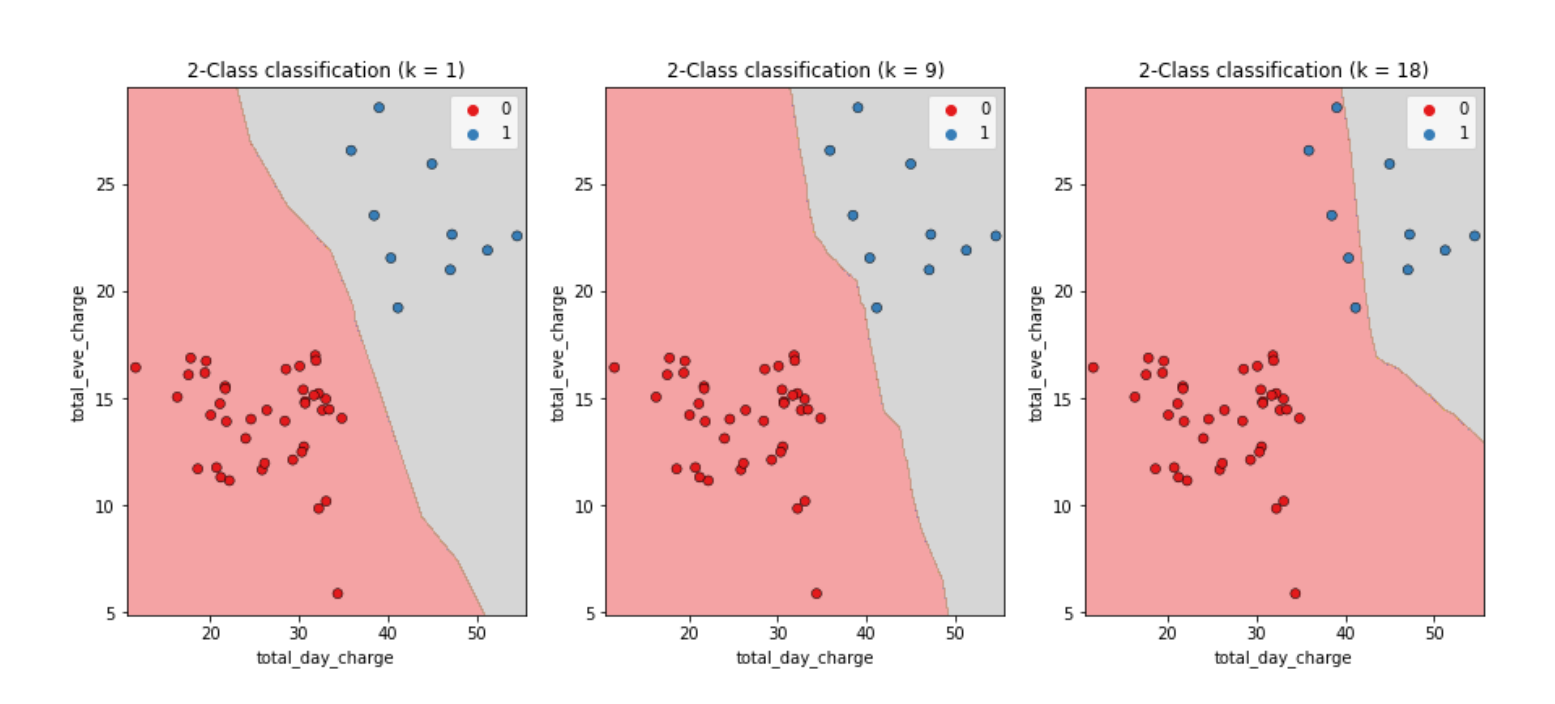




In [ ]:
# plotting model complexity curve

train_accuracies = {}  # defined dictionary type
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


Model complexity curve 
results: 
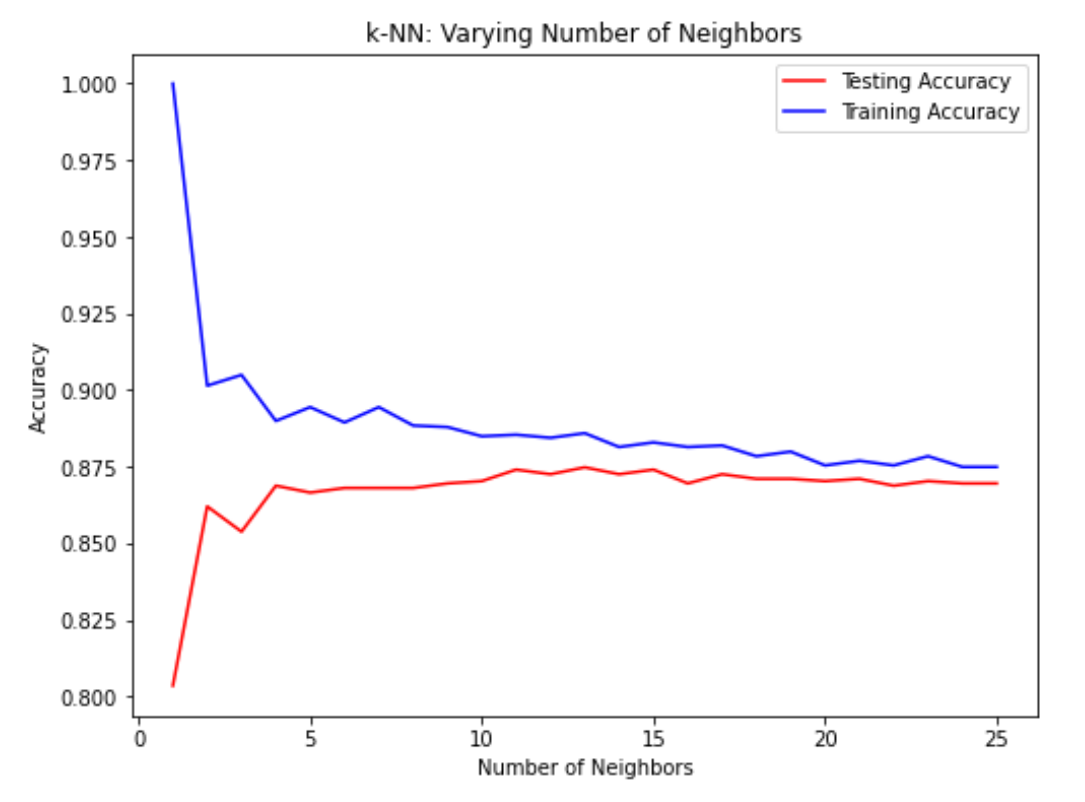

As 'k' increases beyond 15 we see overfitting where performance plateaus on both test and training sets, as indicated in this plots


# 2. Regression
In regression tasks, target variable typically has continuous values  

Creating features and target arrays

In [ ]:
X = diabets_df.drop("glucose", axis=1).values
y = diabets_df['glucose'].values

print(type(X), type(y))
# <class 'numpy.ndarray'> <class 'numpy.ndarray'>

Making predictions from a sinlge feature  
* y.shape, X_bmi.shape is 1-dimensional arrays. **This is fine for y, but our features must be formatted as 2-dimensional array to be accepted by scikit-learn.**  
* to convert the shape of X_bmi we apply Numpy's dot-reshape method : passing -1 followed by 1
  
* reshaped X_bmi (752, 1) is now correct shape for our model 


In [ ]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)
# (752, )(752, )

X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
# (752, 1)

Plotting glucose vs. body mass index

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

Fitting a regression model prediction and plotting

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plt(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

#### Linear regression
-- 
#### Linear regression in higher dimensions
* To fit a linear regression model hear : Need to specify 3 variables: _a1, a2, b_
* In hihger dimension: 
  * Known as a multiple regression
  * Must specify coefficients for each feature and the variable _b_

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

#### Metrics 1. R-squared
R-squared metrics quantifies the variance in target values explained by the features (values range from 0 to 1).  
The default metric for regression models are R-squared 
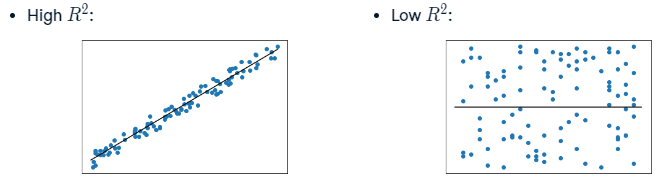

In [ ]:
# R-squared in scikit-learn
reg_all.score(X_test, y_test)
# print > 0.356XXX

#### Metrics 2. Mean-squared-error & Root Mean-squared-error


In [ ]:
from sklearn.metrics import mearn_squared_error
mean_squared_error(y_test, y_pred, squared=False) # RMSE

#### Cross-validation
* Model performance is dependent on the way we split up the data
* Not representative of the model's ability to generalize to unseend ata
* solution: Cross validation !  

무작위 분할에 대한 종속성을 방지하기 위해 교차검증이라는 기술을 사용한다.  
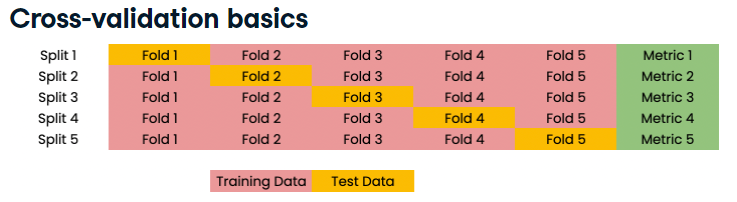

위와 같이 5개의 fold로 구성된 cross-validation을 수행했을 시 5개의 Metric값을 얻게 된다. 
* 평균
* 중앙값
* 95% 신뢰 구간  

모델 성능에 대해 위와 같은 통계값을 얻을 수 있다.  

Using more folds, more computationally expensive.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_split=6, shuffle=True, random_state=42) # default n_split = 5
reg = LinearRegression()

# cross_val_score 함수를 사용하여, 미리 선언한 모델, 데이터, 정답을 인수로 전달하고, cv 인자에 미리 선언한 KFold 객체를 전달한다.
cv_results = cross_val_score(reg, X, y, cv=kf)

# > return cross validation score 
# length of the array is the number of folds utilized.
# score reported is R-squared, as this is the default score for linear regression.

# cv_results에 대한 통계값 (by numpy library)
print(np.mean(cv_results), np.std(cv_results))  # 평균, 표준편차
print(np.quantile(cv_results), [0.025, 0.975])  # 95% 신뢰구간 (95% confidence interval)


cv_results :  
returned 6 results ranging from zero-point-seven to approximately zero-point-seven-seven.
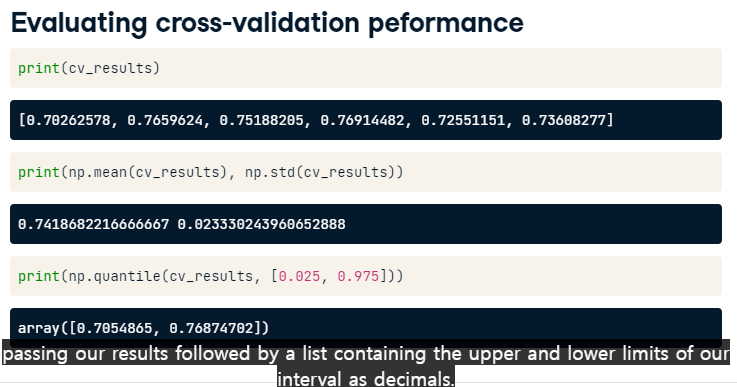

### Regulized regression
a technique used to avoid overfitting  

* Linearn regression minimizes a loss function. It chooses a coefficient, _a_ for each features variable, plus _b_
* Large coefficients can lead to overfitting
* Regularization: **Penalize large coefficients**


#### Ridge regression
* loss function = OLS loss function + alpha * summation(each of squared coefficient)  
  _**OLS loss fucntion = Ordinary Loss Squares_ 
* alpha : hyperparameter we need to choose
  * alpha = 0 = OLS (Can lead to overfitting)
  * very high alpha (Can lead to underfitting)

In [ ]:
from sklearn.lienar_model import Ridge

scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  scores.append(ridge.score(X_test, y_test))

print(scores)
# > return 5 length array

#### Lasso regression
* loss function = OLS loss function + alpha*summation(each of absoluted coefficient)

In [ ]:
from sklearn.linear_model import Lasso

scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
  lasso =Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  score.append(lasso.score(X_test, y_test))

##### Lasso regression for feature selection
* Lasso can select important features of a dataset
* **Shrinks the coefficients of less important features to zero**
* Features not shrunk to zero are selected by lasso

In [ ]:
from sklearn.linear_model import Lasso 

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_Df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

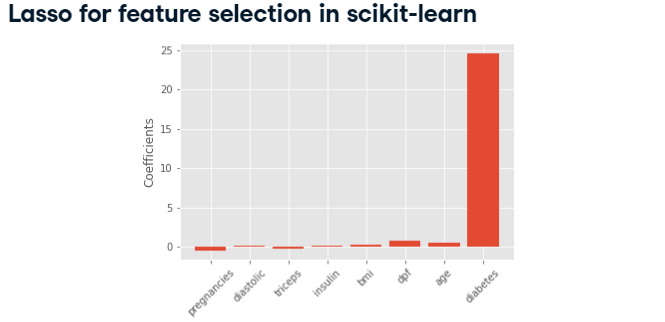

# 3. Fine-Tuning Your model

### how good is your model?

##### Class imbalance
Uneven frequency of classes
* (An example)classification for predicting fraudulent bank transactions : 99% of transactions are legitimate; 1% are fraudulent 
* Could build a classifier that predict NONE of the transactions are fraudulent
  * 99% arrcurate!
  * But terrible at actually predicting fraudulent transactions
  * Fails at its original purpose
* Need a different way to assess performance  

Assessing classification performance
* **precision** : Positive predictive rate (rates about true prediction / predictive true)
* **recall** : Sensitivity (rates about true prediction / real true)
* **F1-score** : useful metric if we are seeking a model which peforms reasonably well across both metrics (두 메트릭에서 모두 합리적일 경우 높은 수치가 나옴/precision, recall의 조화 평균)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborClassificr(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle=True, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))   # return 2x2 array about real labels vs predicted labels
print(classification_report(y_test, y_pred)) # return all the relavant metrics (including precision, recall, f1-score)


support : the number of the samples for each class

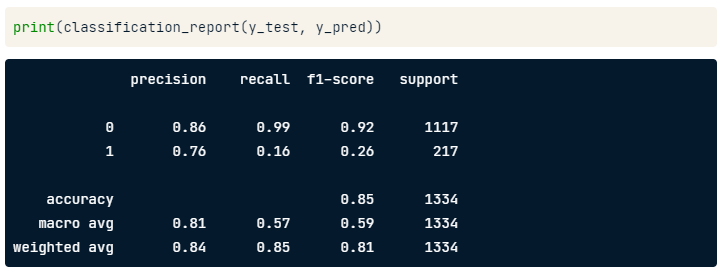

**Quiz**  
Q. Deciding on a primary metric  
   As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem **where precision is best suited as the primary metric**.  

Possible Answers

1. A model predicting the presence of cancer as the positive class.  
> positive 클래스로 암의 존재를 예측하는 경우
2. A classifier predicting the positive class of a computer program containing malware.  
> malware를 가진 컴퓨터 프로그램을 positive class로 예측하는 경우
3. A model predicting if a customer is a high-value lead for a sales team with limited capacity.  
> 소비자가 한정적인 capacity를 가진 판매팀의 high-value lead인지 예측하는 모델

A. (3)   
Correct! With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort.
한정적인 capacity를 가진 경우, 판매팀은 전체 positive 예측 대비 높은 비율의 true positive를 출력하는 모델을 필요로 한다.  

**1 : 이 경우에는 암인데 암이 아니라고 판단하는 비율이 최소인 모델을 필요로함   
> 'Recall(sensitivity)' is the best suited as the primary metric for this case   

**2 : 이 경우에도 malware computer인데 아니라고 판단하는 비율이 최소인 모델을 필요로 함  
> 'Recall(sensitivity)' is the best suited as the primary metric for this case   

#### Logistic regression and the ROC curve
: used for classification.  

**Logistic regression outputs probabilities**
logistic regression produce the linear boundary   

* The threshold values of the logistic regression model is 0.5
* What happens if we vary the threshold?  
  ▶ We can use a **ROC curve** to visualize *how different thresholds affect true positive and false positive rates.*

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# predicting probabilities
y_pred_probs = log_reg.predict_proba(X_test)[:, 1]     # [:, 1] : probabilities for positive class 
print(y_pred_probs[0])    # probabilities of positive class for the first observation

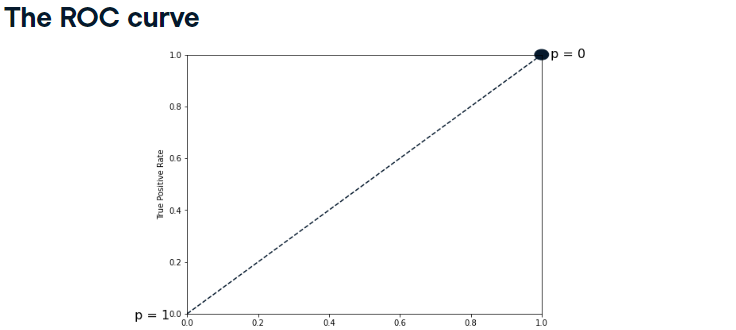

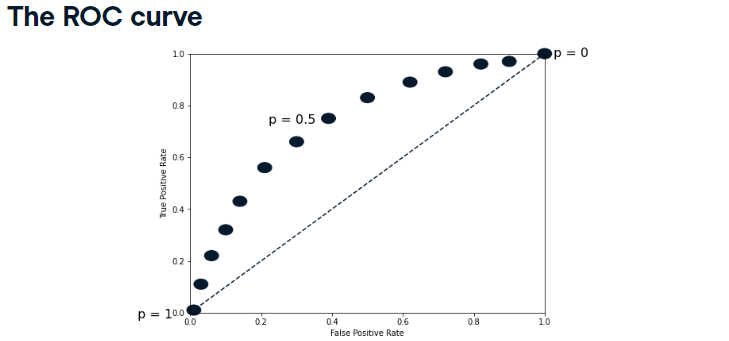

If the p(threshold value) is a zero value, the model predicts 1 for all observations.  
If the p(threshold value) is a one value, the model predicts 0 for all observations.  
If we vary the threshold, we get a series of different false positive and tru posotive rates.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)   # unpacked results with the 3 variables

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression ROC curve')
plt.show()

##### ROC AUC
: If we have a model with one for true positive rate and zero for false positive rate, this would be perfect model.  

* **AUC** : scores range from zero to one, with one being ideal. 

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_probs))
# return AUC score

### Hyperparameter tuning
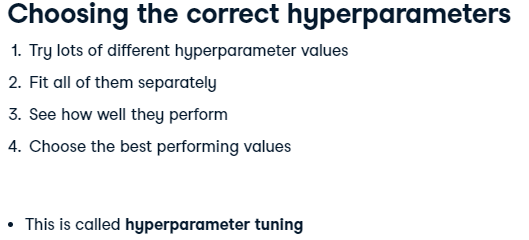


(examples)
* Ridge/Lasso regression : Choosing `alpha`
* KNN : Choosing `n_neighbors`


**Cross-validation**  
It is essential to use cross-validation to avoid overfitting to the test set  
we can still split the data and perform cross-validation on the training set

#### **Grid search cross-validation**

In [ ]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_split=5, shuffle=True, random_state=42)

param_grid = {'alpha': np.arange(0.0001, 1, 10), 
              'solver': ["sag", "lsqr"]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

print(ridge_cv.best_params_, ridge_cv.best_score_)

printed like this  

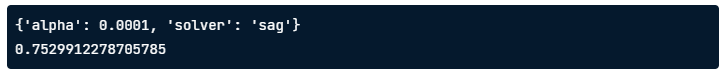  

**Limitation and the alternative approach**  
the number of iteration for grid search = num of hyperparams * the number of folds  
▶ it doesn's scale well!  
(ex) 3 fold cross-valdiation, 1 hyperarameter (10 total values) =  30 fits


#### **RandomizedSearchCV**
: picks random hyperparameter values rather than exhaustively searhcing through all options.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_split=5, shuffle=True, random_state=42)

param_grid = {'alpha': np.arange(0.0001, 1, 10), 
              'solver': ["sag", "lsqr"]}

ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)  # n_iter : determines the number of hyperparameter values tested.
ridge_cv.fit(X_train, y_train) # 5 fold cv with n_iter 2, performed 10 fits for hyperparameters

print(ridge_cv.best_params_, ridge_cv.best_score_)
print(ridge_cv.score(X_test, y_test))   # 자동으로 최적의 모델을 사용하여 score를 리턴하나 봄 #공식 문서엔 명시되어있지 않은 것 같음

# 4. Preprocessing data

⭐ **scikit-learn requirements**
* numeric data
* no missing values  
▶ the real-world data is rarely the case, so will often need to preprocess data fit  

#### Categorical features  
: scikit-learn will not accept categorical features by default
  * need to convert categorical features into numeric values
  * convert to binary features called **dummy variables**  

  [dealing with python] 
  * scikit-learn : `OneHotEncoder()`
  * pandas : `get_dummies()`

**Box plot can show you about the target value distribution according to the classes of the one categorical features
like this   
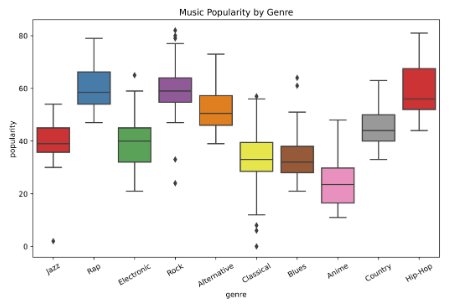

In [ ]:
import pandas as pd

music_dummies = music_df.get_dummies(music_df["genre"], drop_first=True) # to be all zero array has meaning for efficiency
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummeis = music_dummies.drop("genre", axis=1)  # drop the origical categorical features

# Encoding dummy variables
music_dummies = pd.get_dummies(music_df, drop_first=True)
print(music_dummies.columns)

# > return the columns as index list object

#### Handling missing data


In [ ]:
print(music_df.isna().sum().sort_values())
#  summarizing the null information of the music_df 

music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"]) 

#### Imputing the missing data
Imputation - use subejct-matter expertise to replace missing data with educated guesses  
* mean (commonly used)
* median
* For categorical values, the mode value is used the frequently
* **Must split our data first, to avoid data leakage**  
> **data leakage**   
  모델이 데이터에 대해서 완전히 이해하지 못할 때, 모델을 만들고 예측을 진행했는데 100% 가깝게 예측하는 경우 -> data leakage를 의심해볼 수 있다.  
  * target 변수 외에 예측 시점에 사용할 수 없는 (feature로 사용할 수 없는) 데이터가 학습에 포함되어 학습이 이루어질 경우
  * training set 과 validation set이 완전히 분리되지 않은 경우
  * feature 수가 너무 많은 경우
  * Target과 동일한 feature가 있을 경우


In [ ]:
# imputation with scikit-learn using "SimpleImputer"
from sklearn.impute import SimpleImputer

## 근데 꼭 numpy여야 하나욤
X_cat = music_df['genre'].values.reshape(-1, 1)
X_num = music_df.drop(['genre', 'popularity'], axis=1).values
y = music_df['popularity'].values

# split for data leakage
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=12)

imp_cat = SimpleImputer(strategy="most_frequent")

X_train_cat = imp_cat.fit_transform(X_train_cat) 
X_test_cat = imp_cat.transform(X_test_cat)    # without fit

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)    # without fit

# 합체!
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_num, axis=1)

In [ ]:
# imputation with scikit-learn within "pipelines"
from sklearn.pipeline import Pipeline

music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"]) 
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)     # np.where : 조건을 만족하는 index 반환
x = music_df.drop('genre', axis=1).values
y = music_df['genre'].values

steps = [("imputation", SimpleImputer()),
         ("logistic_regression", LogisticRegression())]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

#### Centering and scaling

feature 범위를 확인하기 위해 pandas의 describe 함수를 사용한다.
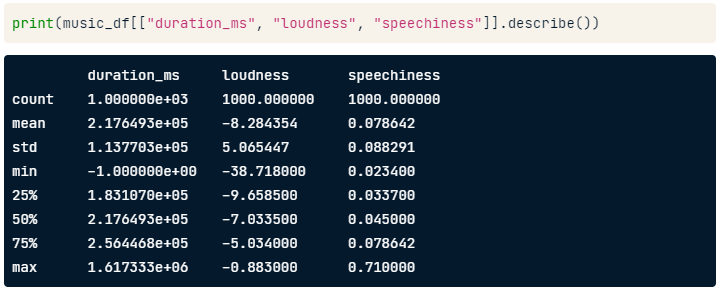


#### Why scale our data?
* Many models use some form of distance to inform them
* Features on larger scales can disproportionately influence the model : 데이터 스케일의 차이가 클 경우, 모델에 불균형적으로 영향을 초래할 수 있음
  
* we wants to feature to be on a similar scale
* Normalizing or standardizing (scaling and centering)

1. Standardization
  * Subtract the mean and divide by variance
  * all features are centered around zero and have a variance of one

2. Normalization
  * Subtrac the minimum and divide by the range
  * Minimum zero and maximum one  
  can also normalize so the data range from -1 to +1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

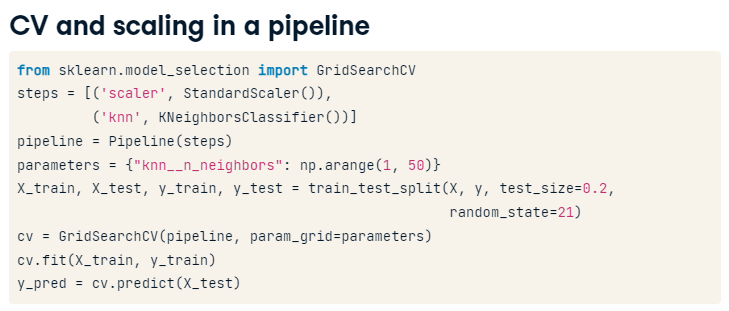

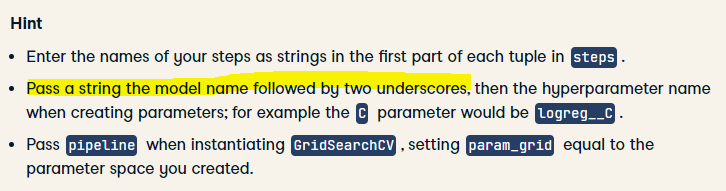

In [ ]:
## np.linspaced vs np.arange 차이 정리

#### Evaluating multiple models
> 다양한 모델을 사용해보고 어떤 모델을 사용할지 선택하는 것은 어떻게 할까?  

**Some guiding principles**
* Size of the dataset
  * Fewer features = simpler model, faster training time
* Interpretability
  * Some models are easier to explain, which can be important for stakeholders(이해관계자)
  * Linear regression has high interpretability, as we can understance the coefficients.  
* Flexibility
  * May improve accuracy, by making fewer assumptions about data
  * KNN is a more flexible model, doesn't assume any linear relationships


**It's all in the metrics**
* regression model metrics : RMSE, R-squared
* classification model metrics : Accuracy, Confusion matrix, Precision, Recall, F1-score, ROC AUC
**A note on scaling**
* Models affected by scaling:
  * KNN, Linear regression (+Ridge, Lasso, ..), Logistic regression, ANN
* Best to scale our data before evaluating models


In [ ]:
# Evaluating classification models
import matplotlib.pyplot as plt

# scikit-learn library to prepare the training
from sklearn.preprocessing import StandarScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# scikit-learn library of classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = music.drop('genre', axis=1).values
y = music['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = sclaer.transform(X_test) 

# model instantiation with a dictionary variable
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier()}

# empty list to store the results
result = []

for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True) # instanciate the KFold inside the loop
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)

plt.boxplot(results, labels=models.key())
plt.show()


result plot  
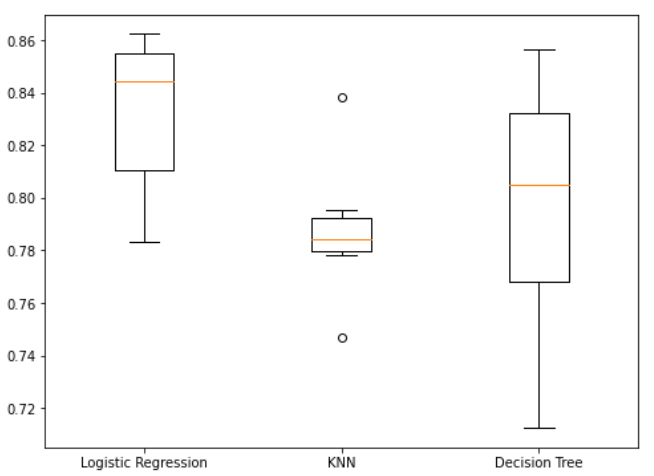

box : the IQR(Q3-Q1) of teh cross-validation scores  
orange line : model's median cross-validation score
▶ Logistic regression model has best performance

In [ ]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)
  print(f"{name} Test Set Accuracy : {test_score}")   # model.score 가 r-squared 값으로 나오는거(regression model) vs accuracy로 나오는거(classification model) 정리하기

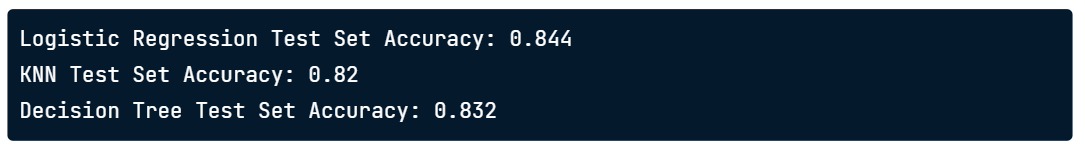

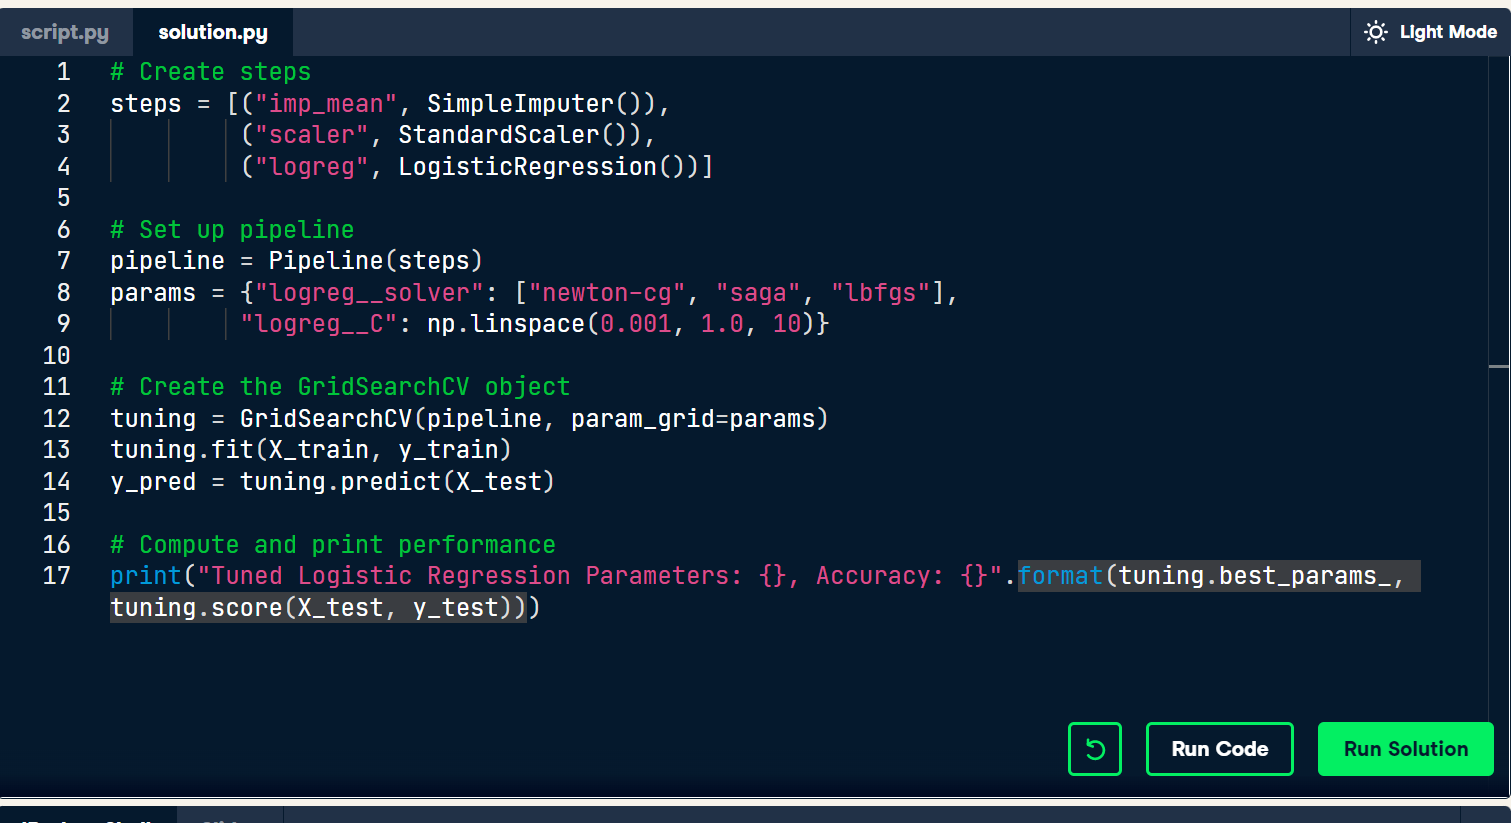